# 《机器学习实战》第 13 章 - 利用 PCA 实现降维

加载数据。

In [1]:
import matplotlib.pyplot as plt
import numpy as np


data = np.loadtxt('../input/testSet.txt', delimiter='\t')
# 使用 NumPy 的矩阵包装一下
data_mat = np.mat(data=data)
data_mat


matrix([[10.235186, 11.321997],
        [10.122339, 11.810993],
        [ 9.190236,  8.904943],
        ...,
        [ 9.854922,  9.201393],
        [ 9.11458 ,  9.134215],
        [10.334899,  8.543604]])

/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['STHeiti'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


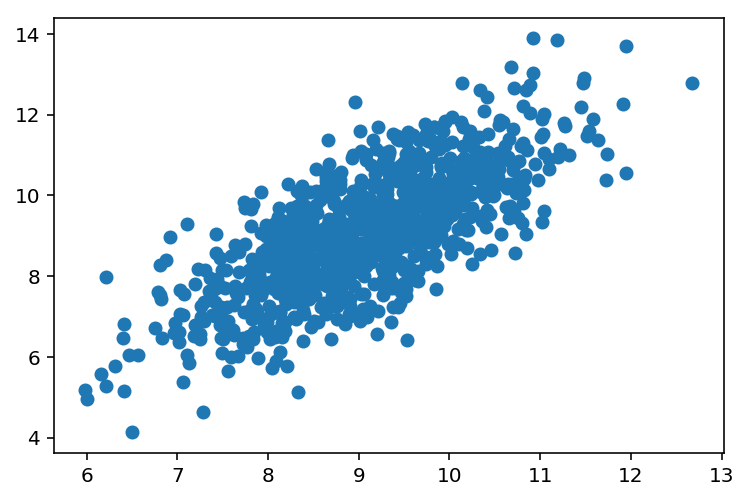

In [2]:
# 看看数据长啥样
fig = plt.figure()
ax = fig.add_subplot(111)
data_arr = data_mat.getA()
plt.scatter(data_arr[:, 0], data_arr[:, 1])
plt.show()

由于计算方差和协方差的需要，首先对原始数据去均值。

In [3]:
# 计算每一列的均值，即每一个特征的均值
# 把每一行的信息压缩了，所以是 axis=0
mean_vals = np.mean(data_mat, axis=0)
mean_vals

matrix([[9.06393644, 9.09600218]])

In [4]:
# 每个向量同时都减去 均值
mean_removed = data_mat - mean_vals
mean_removed

matrix([[ 1.17124956,  2.22599482],
        [ 1.05840256,  2.71499082],
        [ 0.12629956, -0.19105918],
        ...,
        [ 0.79098556,  0.10539082],
        [ 0.05064356,  0.03821282],
        [ 1.27096256, -0.55239818]])

---
## 以下 3 种方法都可以计算协方差矩阵

+ 方法1：把原始矩阵的转置矩阵传入 np.cov 方法

In [5]:
cov_mat = np.cov(mean_removed.T)
cov_mat

array([[1.05198368, 1.1246314 ],
       [1.1246314 , 2.21166499]])

+ 方法2：把原始矩阵传入 np.cov 方法，并且设置 rowvar=False，表示每行不是变量，即每一列才是变量

In [6]:
# 求协方差矩阵
# 如果 rowvar 为 True（默认值），则每行代表一个变量，并在列中显示（即每一列为一个样本）。 
# 否则，关系被转置：每列代表变量，而行包含观察值。
cov_mat = np.cov(mean_removed, rowvar=False)
cov_mat

array([[1.05198368, 1.1246314 ],
       [1.1246314 , 2.21166499]])

+ 方法3：使用协方差矩阵的定义，使用公式计算协方差矩阵。

<b><font size='3' color='ff0000'>计算协方差矩阵的时候，应该除以 $m-1$，这样做是为了保证无偏性，这一点在本科的《数理统计》学教材中均有介绍。</font></b>这里 $m$ 表示数据的个数。


![](./协方差矩阵的定义.jpg)

In [7]:
# 自行计算协方差矩阵
cov_mat_by_myself = mean_removed.T * mean_removed / (mean_removed.shape[0] - 1)
cov_mat_by_myself

matrix([[1.05198368, 1.1246314 ],
        [1.1246314 , 2.21166499]])

可以看到，上面 3 种方式计算得到的协方差矩阵都是一样的。

---

下面对协方差矩阵进行特征分解。

In [8]:
# eig_vals 为特征值， eig_vects 为特征向量
eig_vals, eig_vects = np.linalg.eig(np.mat(cov_mat))

In [9]:
# 得到特征值
eig_vals

array([0.36651371, 2.89713496])

<b><font size='3' color='ff0000'>注意：下面这个矩阵，每一列是一个特征向量。</font></b>

In [10]:
# 得到特征向量
eig_vects

matrix([[-0.85389096, -0.52045195],
        [ 0.52045195, -0.85389096]])

---

对“对称矩阵”做特征值分解，得到的变换矩阵其实是正交矩阵。下面我们就验证一下这件事情。


In [13]:
eig_vects.T * eig_vects

matrix([[ 1.00000000e+00, -2.72770824e-19],
        [-2.72770824e-19,  1.00000000e+00]])

并且这个矩阵的每一行、每一列都是单位向量。

In [18]:
np.linalg.norm(eig_vects.getA()[:,0])

0.9999999999999999

In [19]:
np.linalg.norm(eig_vects.getA()[:,1])

0.9999999999999999

In [20]:
np.linalg.norm(eig_vects.getA()[0,:])

0.9999999999999999

In [21]:
np.linalg.norm(eig_vects.getA()[1,:])

0.9999999999999999

的确如此，所以，你取行向量作为特征向量也是可以的。

---

In [11]:
# 对特征值，进行从小到大的排序，返回从小到大的index序号
# 特征值的逆序就可以得到topNfeat个最大的特征向量
eig_val_ind = np.argsort(eig_vals)
eig_val_ind

array([0, 1])

In [12]:
top_n_feat = 9999999


In [13]:
# -1 表示倒序，返回 top_n 的特征值
eig_val_ind_desc = eig_val_ind[:-(top_n_feat + 1):-1]
eig_val_ind_desc


array([1, 0])

In [14]:
eig_vects

matrix([[-0.85389096, -0.52045195],
        [ 0.52045195, -0.85389096]])

In [15]:
# 每一列是一个特征向量。
# 重组特征向量，从大到小，这里做列重组
red_eig_vects = eig_vects[:, eig_val_ind_desc]
red_eig_vects

matrix([[-0.52045195, -0.85389096],
        [-0.85389096,  0.52045195]])

In [16]:
# 将数据转换到新空间
low_d_data_mat = mean_removed * red_eig_vects
low_d_data_mat

matrix([[-2.51033597,  0.15840394],
        [-2.86915379,  0.5092619 ],
        [ 0.09741085, -0.20728318],
        ...,
        [-0.50166225, -0.62056456],
        [-0.05898712, -0.02335614],
        [-0.18978714, -1.37276015]])

In [17]:
# 恢复回去
recon_mat = (low_d_data_mat * red_eig_vects.T) + mean_vals
recon_mat

matrix([[10.235186, 11.321997],
        [10.122339, 11.810993],
        [ 9.190236,  8.904943],
        ...,
        [ 9.854922,  9.201393],
        [ 9.11458 ,  9.134215],
        [10.334899,  8.543604]])

因为我们这里没有丢失维度，所以数据没有丢失。书本上的原话是：

> ”既然我们没有剔除任何特征，那么重构之后的数据会和原始的数据重合“。

In [18]:
data_mat

matrix([[10.235186, 11.321997],
        [10.122339, 11.810993],
        [ 9.190236,  8.904943],
        ...,
        [ 9.854922,  9.201393],
        [ 9.11458 ,  9.134215],
        [10.334899,  8.543604]])

上述 `recon_mat` 和 `data_mat` 是一致的。

## 示例：使用 PCA 对半导体制造数据降维

In [19]:
data = np.loadtxt('../input/secom.data')
df = pd.DataFrame(data)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,580,581,582,583,584,585,586,587,588,589
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,NaN,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,0.0060,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,0.0148,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,0.0044,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,NaN,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432


In [20]:
# 对每一列的缺失值使用均值填充的技巧：https://blog.csdn.net/Guo_ya_nan/article/details/80878929
for column in list(df.columns[df.isnull().sum() > 0]):
    mean_val = df[column].mean()
    df[column].fillna(mean_val, inplace=True)


In [21]:
data_mat = df.values
mean_vals = np.mean(data_mat, axis=0)
mean_removed = data_mat - mean_vals
cov_mat = np.cov(mean_removed, rowvar=False)

In [22]:
eig_vals, eig_vects = np.linalg.eig(np.mat(cov_mat))
eig_vals

array([ 5.34151979e+07,  2.17466719e+07,  8.24837662e+06,  2.07388086e+06,
        1.31540439e+06,  4.67693557e+05,  2.90863555e+05,  2.83668601e+05,
        2.37155830e+05,  2.08513836e+05,  1.96098849e+05,  1.86856549e+05,
        1.52422354e+05,  1.13215032e+05,  1.08493848e+05,  1.02849533e+05,
        1.00166164e+05,  8.33473762e+04,  8.15850591e+04,  7.76560524e+04,
        6.66060410e+04,  6.52620058e+04,  5.96776503e+04,  5.16269933e+04,
        5.03324580e+04,  4.54661746e+04,  4.41914029e+04,  4.15532551e+04,
        3.55294040e+04,  3.31436743e+04,  2.67385181e+04,  1.47123429e+04,
        1.44089194e+04,  1.09321187e+04,  1.04841308e+04,  9.48876548e+03,
        8.34665462e+03,  7.22765535e+03,  5.34196392e+03,  4.95614671e+03,
        4.23060022e+03,  4.10673182e+03,  3.41199406e+03,  3.24193522e+03,
        2.74523635e+03,  2.35027999e+03,  2.16835314e+03,  1.86414157e+03,
        1.76741826e+03,  1.70492093e+03,  1.66199683e+03,  1.53948465e+03,
        1.33096008e+03,  

In [23]:
indexes = np.argsort(eig_vals)

In [24]:
# 前 20 个特征值从大到小排列，
top_20 = eig_vals[list(reversed(indexes))[:20]]
top_20

array([53415197.85687523, 21746671.9046592 ,  8248376.61529074,
        2073880.85929397,  1315404.3877583 ,   467693.55734419,
         290863.55541773,   283668.60065106,   237155.82977109,
         208513.83582176,   196098.84856315,   186856.54901859,
         152422.35398714,   113215.03198428,   108493.84818587,
         102849.53283606,   100166.16423586,    83347.37616028,
          81585.05905974,    77656.05239293])

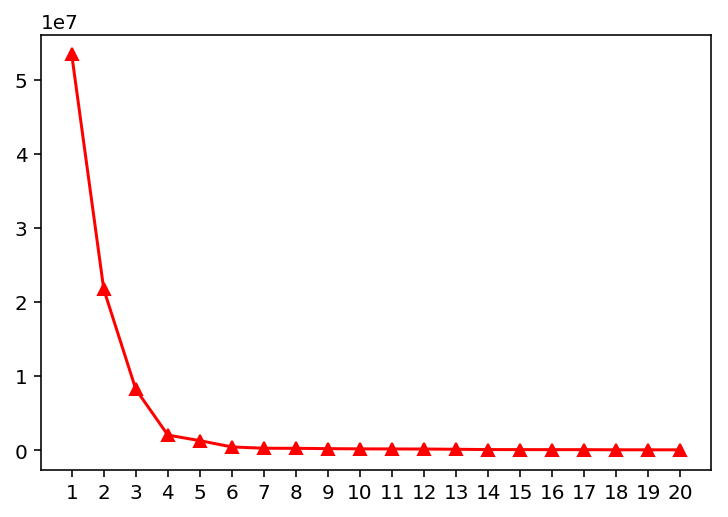

In [25]:
plt.plot(list(range(1, 21)), top_20, '^-', c='r')
plt.xticks(list(range(1, 21)))
plt.show()

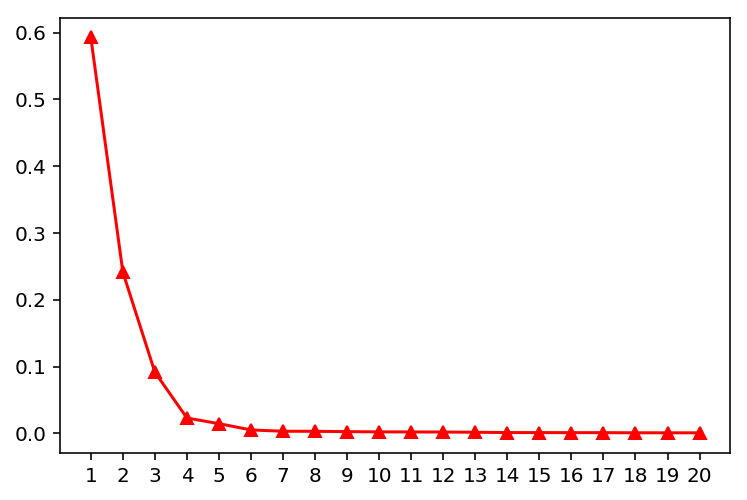

In [26]:
plt.plot(list(range(1, 21)), top_20 / np.sum(eig_vals), '^-', c='r')
plt.xticks(list(range(1, 21)))
plt.show()

In [27]:
top_20_percent = top_20/np.sum(eig_vals)
top_20_percent

array([0.59254058, 0.24123819, 0.09150014, 0.02300579, 0.01459192,
       0.00518818, 0.00322658, 0.00314677, 0.0026308 , 0.00231307,
       0.00217535, 0.00207282, 0.00169084, 0.00125591, 0.00120353,
       0.00114092, 0.00111115, 0.00092458, 0.00090503, 0.00086145])

In [28]:
top_20_percent_cumsum = np.cumsum(top_20_percent)
top_20_percent_cumsum

array([0.59254058, 0.83377877, 0.9252789 , 0.94828469, 0.96287661,
       0.96806479, 0.97129137, 0.97443814, 0.97706893, 0.979382  ,
       0.98155734, 0.98363016, 0.985321  , 0.98657691, 0.98778044,
       0.98892136, 0.99003252, 0.9909571 , 0.99186213, 0.99272358])

In [29]:
result = pd.DataFrame(np.vstack((top_20_percent, top_20_percent_cumsum)).T, index=list(
    range(1, 21)), columns=['方差百分比', '累计方差百分比'])

result.head()

,方差百分比,累计方差百分比
1,0.592541,0.592541
2,0.241238,0.833779
3,0.091500,0.925279
4,0.023006,0.948285
5,0.014592,0.962877


In [30]:
result.loc[20]

方差百分比      0.000861
累计方差百分比    0.992724
Name: 20, dtype: float64

说明前 20 个主成分就包含了原始数据百分之 99 以上的信息。

---

## 补充知识1：特征值和特征向量 np.linalg.eig 的使用

官方文档：https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.eig.html

In [31]:
w, v = np.linalg.eig([[3, 4], [5, 2]])

In [32]:
w

array([ 7., -2.])

$7$ 和 $-2$ 是特征值是没有问题的。如果我们手算：

$7$ 对应的特征向量是：$c_1\alpha_1$，其中 $c_1 \neq 0$，为任意常数，$\alpha_1 = \begin{bmatrix} 1 \\\ 1 \end{bmatrix}$，  
$-2$ 对应的特征向量是：$c_2\alpha_2$，
其中 $c_2 \neq 0$，为任意常数，$\alpha_2 = \begin{bmatrix} 4 \\\ -5 \end{bmatrix}$。

In [33]:
v

array([[ 0.70710678, -0.62469505],
       [ 0.70710678,  0.78086881]])

In [34]:
4 / -5

-0.8

In [35]:
-0.62469505 / 0.78086881

-0.8000000025612498

所以，<b><font size='3' color='ff0000'>请一定记住：`np.linalg.eig` 返回的结果中，第 2 个值是矩阵，它每一列是特征向量，这也符合我们的直觉和绝大多数教材的写法。 </font></b>

In [36]:
v[:, 0]


array([0.70710678, 0.70710678])

In [37]:
v[:, 1]


array([-0.62469505,  0.78086881])

## 补充知识点2：使用 SVD 完成 PCA

我们把上面 PCA 的过程进行一下封装。

### 这一版使用对协方差矩阵进行特征值分解的方式实现 PCA 降维。

In [38]:
import numpy as np


class PCA1:
    
    def __init__(self, n_components):
        self.n_components = n_components
        self.mean_vals = None
        self.mean_removed = None
        # 主成分，即协方差矩阵特征值从大到小排序，按列排成的矩阵
        self.components_ = None
        # 能解释的方差，其实就是协方差矩阵特征值从大到小排序，组成的数组
        self.explained_variance_ = None

        self.low_d_data_mat = None

    def fit(self, X):
        mean_vals = np.mean(X, axis=0)
        mean_removed = X - mean_vals

        self.mean_vals = mean_vals
        self.mean_removed = mean_removed

        cov_mat = mean_removed.T.dot(
            mean_removed) / (mean_removed.shape[0] - 1)
        eig_vals, eig_vects = np.linalg.eig(cov_mat)
        eig_val_ind = np.argsort(eig_vals)
        eig_val_ind_desc = eig_val_ind[:-(self.n_components + 1):-1]
        # 【注意】eig_vects 这个矩阵的每一列是特征向量
        red_eig_vects = eig_vects[:, eig_val_ind_desc]
        self.components_ = red_eig_vects
        self.explained_variance_ = eig_vals[eig_val_ind_desc]

    def transform(self):
        """
        得到一个原始样本的低维度近似表示
        """
        self.low_d_data_mat = self.mean_removed.dot(self.components_)
        return self.low_d_data_mat + self.mean_vals

    def inverse_transform(self):
        """
        将原始样本的低维度近似表示恢复到高维度表示
        """
        return self.low_d_data_mat.dot(self.components_.T) + self.mean_vals

In [39]:
data = np.loadtxt('../input/testSet.txt', delimiter='\t')
data

array([[10.235186, 11.321997],
       [10.122339, 11.810993],
       [ 9.190236,  8.904943],
       ...,
       [ 9.854922,  9.201393],
       [ 9.11458 ,  9.134215],
       [10.334899,  8.543604]])

In [40]:
pca1 = PCA1(n_components=2)
pca1.fit(data)
pca1.transform()

array([[6.55360047, 9.25440612],
       [6.19478265, 9.60526408],
       [9.16134729, 8.888719  ],
       ...,
       [8.56227419, 8.47543762],
       [9.00494931, 9.07264604],
       [8.8741493 , 7.72324203]])

In [41]:
pca1.inverse_transform()

array([[10.235186, 11.321997],
       [10.122339, 11.810993],
       [ 9.190236,  8.904943],
       ...,
       [ 9.854922,  9.201393],
       [ 9.11458 ,  9.134215],
       [10.334899,  8.543604]])

In [42]:
pca1.components_

array([[-0.52045195, -0.85389096],
       [-0.85389096,  0.52045195]])

### 使用对原始数据矩阵使用 SVD 得到主成分的方式实现 PCA 降维

下面，我们绕过计算协方差矩阵，直接将去均值以后的矩阵进行 SVD 分解，得到的第 3 个参数，就是 $V^T$。

In [43]:
data = np.loadtxt('../input/testSet.txt', delimiter='\t')
data
mean_vals = np.mean(data, axis=0)
mean_removed = data - mean_vals

# 官方文档：https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.svd.html
U, S, VT = np.linalg.svd(mean_removed)

我们看 $V^T$ 的时候，应该对它进行转置。

In [44]:
S

array([53.79812098, 19.13497308])

In [45]:
np.sqrt(S[0]) / np.sqrt(S[1])

1.6767550606855024

In [46]:
pca1.explained_variance_

array([2.89713496, 0.36651371])

In [47]:
VT.T

array([[-0.52045195,  0.85389096],
       [-0.85389096, -0.52045195]])

In [48]:
pca1.components_

array([[-0.52045195, -0.85389096],
       [-0.85389096,  0.52045195]])

<b><font size='3' color='ff0000'>发现和之间计算出来的主成分相比，第 1 个主成分是一模一样的，第 2 个只是差了一个符号，这是完全合理的，因为我们要求的主成分其实是坐标轴方向。</font></b>

因此，我们可以对 `PCA1` 进行修改。

In [49]:
class PCA2:
    def __init__(self, n_components):
        self.n_components = n_components
        self.mean_vals = None
        self.mean_removed = None
        # 主成分，即协方差矩阵特征值从大到小排序，按列排成的矩阵
        self.components_ = None
        self.low_d_data_mat = None

    def fit(self, X):
        mean_vals = np.mean(X, axis=0)
        mean_removed = X - mean_vals
        self.mean_vals = mean_vals
        self.mean_removed = mean_removed
        U, S, VT = np.linalg.svd(mean_removed)
        self.components_ = VT.T[:, :self.components_]

    def transform(self):
        self.low_d_data_mat = self.mean_removed.dot(self.components_)
        return self.low_d_data_mat + self.mean_vals

    def inverse_transform(self):
        return self.low_d_data_mat.dot(self.components_.T) + self.mean_vals

In [50]:
data = np.loadtxt('../input/testSet.txt', delimiter='\t')
pca2 = PCA2(n_components=2)
pca2.fit(data)
pca2.transform()

array([[ 6.55360047,  8.93759824],
       [ 6.19478265,  8.58674028],
       [ 9.16134729,  9.30328536],
       ...,
       [ 8.56227419,  9.71656674],
       [ 9.00494931,  9.11935832],
       [ 8.8741493 , 10.46876233]])

In [51]:
pca2.inverse_transform()

array([[10.235186, 11.321997],
       [10.122339, 11.810993],
       [ 9.190236,  8.904943],
       ...,
       [ 9.854922,  9.201393],
       [ 9.11458 ,  9.134215],
       [10.334899,  8.543604]])

## 使用 scikit-learn 提供的 PCA

官方文档：https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

In [54]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
data_reduce = pca.fit_transform(data)
data_reduce

array([[-2.51033597,  0.15840394],
       [-2.86915379,  0.5092619 ],
       [ 0.09741085, -0.20728318],
       ...,
       [-0.50166225, -0.62056456],
       [-0.05898712, -0.02335614],
       [-0.18978714, -1.37276015]])

In [55]:
data.mean(axis=0)

array([9.06393644, 9.09600218])

In [56]:
data_reduce + data.mean(axis=0)

array([[6.55360047, 9.25440612],
       [6.19478265, 9.60526408],
       [9.16134729, 8.888719  ],
       ...,
       [8.56227419, 8.47543762],
       [9.00494931, 9.07264604],
       [8.8741493 , 7.72324203]])

In [57]:
data_reduce + pca.mean_

array([[6.55360047, 9.25440612],
       [6.19478265, 9.60526408],
       [9.16134729, 8.888719  ],
       ...,
       [8.56227419, 8.47543762],
       [9.00494931, 9.07264604],
       [8.8741493 , 7.72324203]])

In [58]:
pca.inverse_transform(data_reduce)

array([[10.235186, 11.321997],
       [10.122339, 11.810993],
       [ 9.190236,  8.904943],
       ...,
       [ 9.854922,  9.201393],
       [ 9.11458 ,  9.134215],
       [10.334899,  8.543604]])

In [59]:
pca.singular_values_

array([53.79812098, 19.13497308])

In [60]:
# scikit-learn 中也是直接对去均值以后的数据做奇异值分解
S

array([53.79812098, 19.13497308])

In [61]:
pca.mean_

array([9.06393644, 9.09600218])

In [62]:
data.mean(axis=0)

array([9.06393644, 9.09600218])

In [63]:
pca.explained_variance_

array([2.89713496, 0.36651371])

In [64]:
pca1.explained_variance_

array([2.89713496, 0.36651371])

---

## 对称矩阵的特征值分解和奇异值分解

In [65]:
matrix = np.array([[1, 2, 3],
          [2, 4, 9],
          [3, 9, 10]])

In [66]:
matrix

array([[ 1,  2,  3],
       [ 2,  4,  9],
       [ 3,  9, 10]])

In [67]:
matrix.T

array([[ 1,  2,  3],
       [ 2,  4,  9],
       [ 3,  9, 10]])

In [68]:
w, v = np.linalg.eig(matrix)
U, S, VT = np.linalg.svd(matrix)

In [69]:
# 对称矩阵的特征值分解，得到的特征值有正有负，并且也是从大到小排列的
w

array([17.28413467,  0.2088681 , -2.49300277])

In [70]:
# 可以看到，对称矩阵的奇异值分解，奇异值全是正的，并且从大到小排列
S

array([17.28413467,  2.49300277,  0.2088681 ])

In [71]:
v

array([[ 0.21605277,  0.9752588 , -0.04681309],
       [ 0.56973274, -0.16486157, -0.80512438],
       [ 0.79292232, -0.14727841,  0.59125567]])

In [72]:
U

array([[-0.21605277, -0.04681309, -0.9752588 ],
       [-0.56973274, -0.80512438,  0.16486157],
       [-0.79292232,  0.59125567,  0.14727841]])

In [73]:
v[:, 0] / U[:, 0]

array([-1., -1., -1.])

In [74]:
v[:, 1]

array([ 0.9752588 , -0.16486157, -0.14727841])

In [75]:
U[:, 2]

array([-0.9752588 ,  0.16486157,  0.14727841])

In [76]:
v[:, 2]

array([-0.04681309, -0.80512438,  0.59125567])

In [77]:
U[:, 1]

array([-0.04681309, -0.80512438,  0.59125567])

小结：

+ 主成分分析得到主成分，这些主成分是新空间的基底；
+ 得到降维以后的数据获得：

用原始数据矩阵 ✖️ 主成分按【列】排成的矩阵 = 降维以后的数据

$$
(m \times n) \times (n \times k) = (m \times k)
$$

这里 $n > k$。

+ 恢复数据（会有一定损失）：

使用降维以后的数据 ✖️ 主成分按【列】排成的矩阵的转置 = 原始数据矩阵的近似矩阵

$$
(m \times k) \times (k \times n) = (m \times n)
$$

这里 $n > k$。



## 涉及到的《线性代数》的知识点有：

+ 空间中的坐标、基底
+ 线性变换
+ 相似、相似变换

相似变换其实就是两组基底的过渡矩阵（或者转置，看是谁过渡到谁）

+ 相似变换的应用：矩阵对角化
+ 对称矩阵的对角化
+ 正交变换

可以看出，PCA 是复习”线性代数“的绝佳材料。